# Perceptron learning algorithm to implement Logic gates with Backpropagation algorithm


In [634]:
import numpy as np
import matplotlib.pyplot as plt

In [655]:
train_x = np.array([[0,0,1,1],[0,1,0,1]])
train_y = np.array([[0,1,1,0]])

In [636]:
n_x = train_x.shape[0]
n_h = 2
n_y = 1
layers_dims = (n_x, n_h, n_y)

In [638]:
def relu(z):
    A = np.maximum(0,z)
    return A, z

In [683]:
np.random.seed(1)
def initialize_parameters(n_x, n_h, n_y):    
    W1 = np.random.randn(n_h, n_x)*.001
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y, n_h)*.001
    b2 = np.zeros((n_y, 1))
    
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters    

In [684]:
def linear_forward(A, W, b):
    
    Z = np.dot(W, A)+b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [685]:
def linear_activation_forward(A_prev, W, b, activation):
   
    if activation=="relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    else:
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)  
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [686]:
def xor_model_forward(X, parameters):

    caches = []
    A = X
    
    A, cache = linear_activation_forward(A, parameters["W1"], parameters["b1"],"relu")#hidden layer
    caches.append(cache)
    
    AL, cache = linear_activation_forward(A, parameters["W2"], parameters["b2"],"relu")#output layer
    caches.append(cache)
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

In [687]:
def compute_cost(AL, Y):

    m = Y.shape[1]

    # Compute loss from aL and y.
    cost = np.sum((Y-AL)**2)/2
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

In [688]:
def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = np.dot(dZ, A_prev.T)#/m
    db = np.sum(dZ, axis = 1, keepdims = True)#/m
    dA_prev = np.dot(W.T, dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [689]:
def linear_activation_backward(dA, cache):

    linear_cache, activation_cache = cache
    
    Z = activation_cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    dA_prev, dW, db = linear_backward(dZ, linear_cache)

    return dA_prev, dW, db

In [690]:
def xor_model_backward(AL, Y, caches):
    
    grads = {}
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    dAL = AL - Y
    #output layer
    current_cache = caches[1]
    grads["dA1"], grads["dW2"], grads["db2"] = linear_activation_backward(dAL, current_cache)
    
    #hidden layer
    current_cache = caches[0]
    _, grads["dW1"], grads["db1"] = linear_activation_backward(grads["dA1"], current_cache)

    return grads

In [691]:
def update_parameters(parameters, grads, learning_rate):
    
    parameters["W1"] = parameters["W1"] - learning_rate*grads['dW1']
    parameters["b1"] = parameters["b1"] - learning_rate*grads['db1']
    
    parameters["W2"] = parameters["W2"] - learning_rate*grads['dW2']
    parameters["b2"] = parameters["b2"] - learning_rate*grads['db2']
    
    return parameters

In [692]:
def predict(parameters,X):
    AL, _ = xor_model_forward(X, parameters)
    return AL

In [693]:
def xor_nn_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    
     # Loop (gradient descent)
    for i in range(0, num_iterations):
        #Forward propagation
        AL, caches = xor_model_forward(X, parameters)
        
        # Compute cost
        cost = compute_cost(AL, Y)

        # Backward propagation.
        grads = xor_model_backward(AL, Y, caches)
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        y_predict = predict(parameters,X)
        if print_cost and i % 1000 == 0:
            print("y_predict: ",y_predict)
            print ("Cost after iteration %i: %f" %(i, cost))
            costs.append(cost)
    
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations ')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    d = {"costs": costs,
         "Y_prediction_train" : AL, 
         "parameters" : parameters,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

y_predict:  [[0.01500003 0.01500034 0.01500017 0.01500019]]
Cost after iteration 0: 1.000000
y_predict:  [[0.49991242 0.50005136 0.50018426 0.49991284]]
Cost after iteration 1000: 0.499796
y_predict:  [[0.48371536 0.51044886 0.53401816 0.48399368]]
Cost after iteration 2000: 0.462564
y_predict:  [[0.08853206 0.92796874 0.93851636 0.08873129]]
Cost after iteration 3000: 0.012452
y_predict:  [[0.00124201 0.9991207  0.99912429 0.00124707]]
Cost after iteration 4000: 0.000002
y_predict:  [[1.49840107e-05 9.99989267e-01 9.99989509e-01 1.49616176e-05]]
Cost after iteration 5000: 0.000000
y_predict:  [[1.80161125e-07 9.99999874e-01 9.99999872e-01 1.79656625e-07]]
Cost after iteration 6000: 0.000000
y_predict:  [[2.15562396e-09 9.99999998e-01 9.99999998e-01 2.15956882e-09]]
Cost after iteration 7000: 0.000000
y_predict:  [[2.59409258e-11 1.00000000e+00 1.00000000e+00 2.59993860e-11]]
Cost after iteration 8000: 0.000000
y_predict:  [[3.0972965e-13 1.0000000e+00 1.0000000e+00 3.0972965e-13]]
Cos

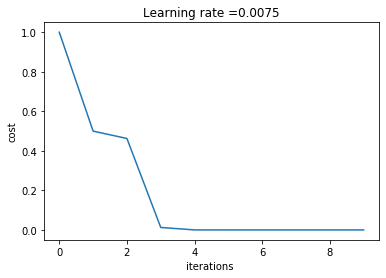

In [701]:
d = xor_nn_model(train_x, train_y, layers_dims, num_iterations = 10000, print_cost = True)

y_predict:  [[0. 0. 0. 0.]]
Cost after iteration 0: 1.000000
y_predict:  [[0. 0. 0. 0.]]
Cost after iteration 1000: 1.000000
y_predict:  [[0. 0. 0. 0.]]
Cost after iteration 2000: 1.000000
y_predict:  [[0. 0. 0. 0.]]
Cost after iteration 3000: 1.000000
y_predict:  [[0. 0. 0. 0.]]
Cost after iteration 4000: 1.000000
y_predict:  [[0. 0. 0. 0.]]
Cost after iteration 5000: 1.000000
y_predict:  [[0. 0. 0. 0.]]
Cost after iteration 6000: 1.000000
y_predict:  [[0. 0. 0. 0.]]
Cost after iteration 7000: 1.000000
y_predict:  [[0. 0. 0. 0.]]
Cost after iteration 8000: 1.000000
y_predict:  [[0. 0. 0. 0.]]
Cost after iteration 9000: 1.000000


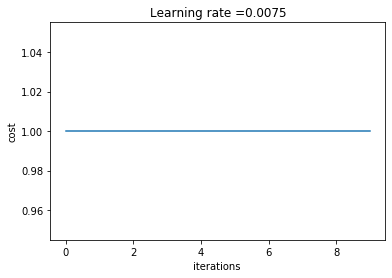

In [702]:
d = xor_nn_model(train_x, train_y, layers_dims, learning_rate = 0.0075,num_iterations = 10000, print_cost = True)

y_predict:  [[0.01499999 0.015001   0.01500075 0.0150017 ]]
Cost after iteration 0: 0.999998
y_predict:  [[0.49999229 0.50002228 0.49999394 0.49999595]]
Cost after iteration 1000: 0.499986
y_predict:  [[0.49882111 0.50430239 0.49882283 0.49882468]]
Cost after iteration 2000: 0.497286
y_predict:  [[0.40529432 0.81339656 0.40529716 0.40667725]]
Cost after iteration 3000: 0.358898
y_predict:  [[0.33400029 0.99849699 0.33474909 0.33404106]]
Cost after iteration 4000: 0.332854
y_predict:  [[0.22479692 0.95649537 0.65717924 0.22636488]]
Cost after iteration 5000: 0.110962
y_predict:  [[0.00484822 0.99654009 0.99646145 0.00484822]]
Cost after iteration 6000: 0.000036
y_predict:  [[5.89807298e-05 9.99958574e-01 9.99959168e-01 5.94250677e-05]]
Cost after iteration 7000: 0.000000
y_predict:  [[7.03846781e-07 9.99999496e-01 9.99999503e-01 7.03846781e-07]]
Cost after iteration 8000: 0.000000
y_predict:  [[8.45688414e-09 9.99999994e-01 9.99999994e-01 8.47115963e-09]]
Cost after iteration 9000: 0.00

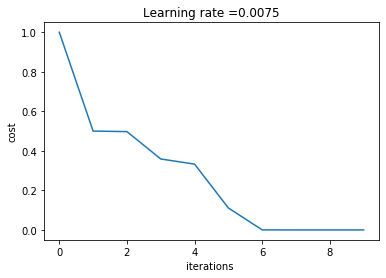

In [703]:
d = xor_nn_model(train_x, train_y, layers_dims, learning_rate = 0.0075,num_iterations = 10000, print_cost = True)

y_predict:  [[0.0075     0.00750062 0.00749995 0.00750023]]
Cost after iteration 0: 0.999999
y_predict:  [[0.49996649 0.50011632 0.49997544 0.49996696]]
Cost after iteration 1000: 0.499921
y_predict:  [[0.49354669 0.52171812 0.49539632 0.49354669]]
Cost after iteration 2000: 0.485367
y_predict:  [[0.25901103 0.90911063 0.64577784 0.25970449]]
Cost after iteration 3000: 0.134495
y_predict:  [[0.0060663  0.99573836 0.99556183 0.00607085]]
Cost after iteration 4000: 0.000056
y_predict:  [[7.38094821e-05 9.99948228e-01 9.99948314e-01 7.38035978e-05]]
Cost after iteration 5000: 0.000000
y_predict:  [[8.82126897e-07 9.99999362e-01 9.99999372e-01 8.82126897e-07]]
Cost after iteration 6000: 0.000000
y_predict:  [[1.06373440e-08 9.99999993e-01 9.99999992e-01 1.06518529e-08]]
Cost after iteration 7000: 0.000000
y_predict:  [[1.27973305e-10 1.00000000e+00 1.00000000e+00 1.28251791e-10]]
Cost after iteration 8000: 0.000000
y_predict:  [[1.53374679e-12 1.00000000e+00 1.00000000e+00 1.54654444e-12]]

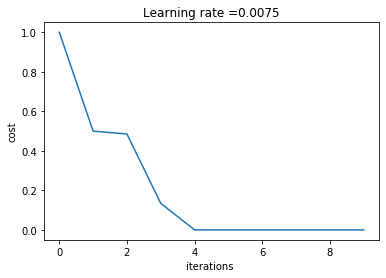

In [704]:
d = xor_nn_model(train_x, train_y, layers_dims, learning_rate = 0.0075,num_iterations = 10000, print_cost = True)